#  로지스틱 회귀
- 로지스틱 회귀 개념
- 공부한 시간과 합격할 확률 관계
- 분류 확률 predict_proba() 이해
- 소프트맥스 함수 이해
- 신경망의 분류 모델에 사용됨


## import

In [17]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# 공부한 시간과 합격률
- 합격자, 불합격자의 공부한 시간 데이터를 사용하여 로지스틱 회귀 모델 구현

In [18]:
## 합격자, 불합격자의 공부한 시간 데이터

pass_time = [6,7,9.5,10,11,11.5,12,13,14,14.5,16,16.5,17,19]
fail_time = [2,2.6,3,3.2,3.6,4,5,5.2,6,7,8,9]

print('합격자수, 불합격자수: ', len(pass_time), len(fail_time))
study_time = np.concatenate((pass_time, fail_time))

# 합격자, 불합격자 데이터프레임
df = pd.DataFrame(study_time, columns=['study_time'])
df['pass'] = [1]*len(pass_time) + [0]*len(fail_time)
print(df.shape)
df[:5]

합격자수, 불합격자수:  14 12
(26, 2)


,study_time,pass
0,6.0,1
1,7.0,1
2,9.5,1
3,10.0,1
4,11.0,1


## 산포도

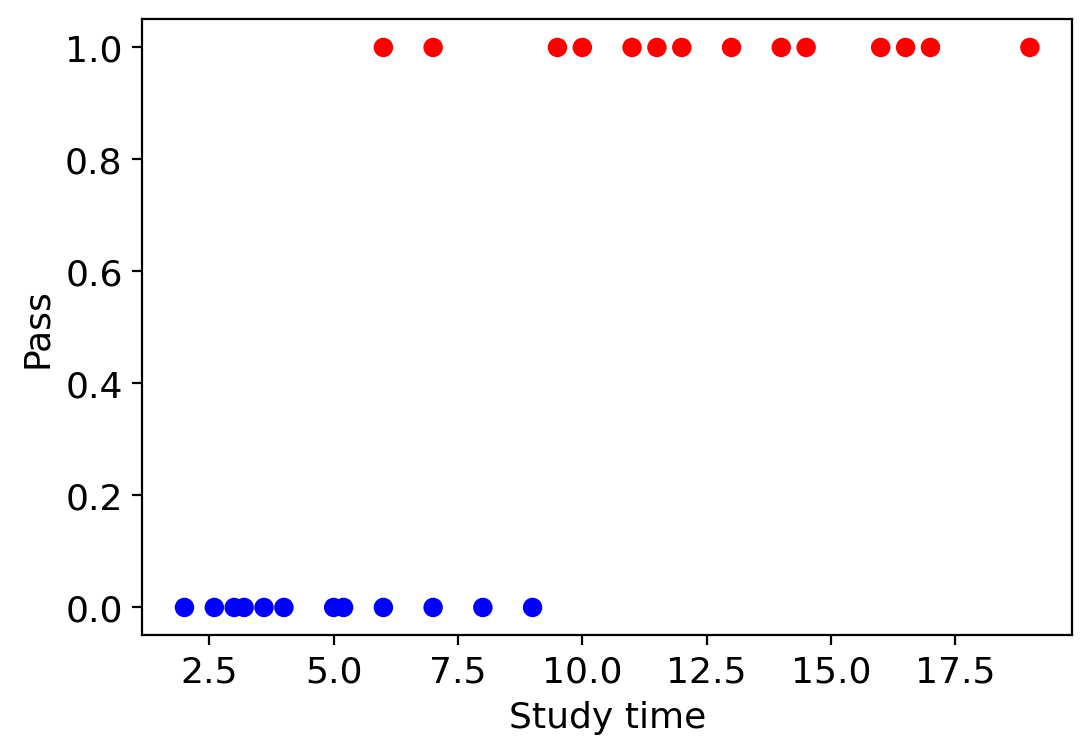

In [19]:
## 합격자, 불합격자의 산포도 보기

plt.scatter(df['study_time'], df['pass'], c=df['pass'], cmap='bwr')
plt.xlabel("Study time")
plt.ylabel("Pass")
plt.show()

## 시그모이드 함수
- 로지스틱 회귀모델은 입출력 관계 모델링에 시그모이드 함수를 한다 (선형 모델은 직선을 사용)
- "회귀"모델이지만 확률 수치를 예측하고 이를 이진 분류에 사용한다

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.11.56.png?raw=1" align='left'  width=400>

## 확률 p인 사건의 가치 (score)

- $log$(${1}\over{p}$) = $log$(1 + $e ^ {-s}$) $\approx$ $log$($e ^ {-s}$) = $-s$
- 확률 $p$ $\approx$ $e ^ {s}$
- 즉, 선형적인 값(score)과 확률(p)의 관계는 로그와 exp 의 관계이다
 - 확률로부터 이에 상응하는 점수를 얻을때는 로그를 취하고
 - 어떤 사건에 해당하는 점수로부터 확률을 구할 때는 exp를 취한다

## 시그모이드 함수의 특성

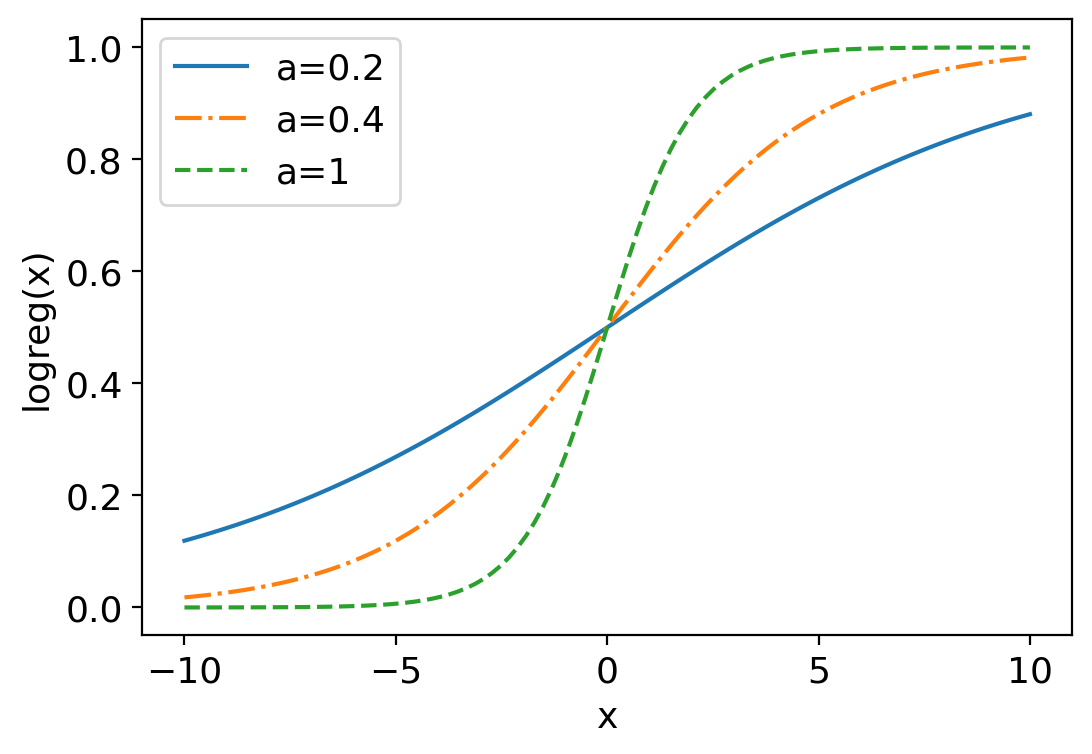

In [20]:
## 시그모이드 함수의 특성 (가중치와 절편, a, b의 의미)

# 시그모이드 함수 정의
def logreg(s):
    return 1 /(1+np.exp(-s)) 

# 여러가지 a 값의 차이 보기
xs = np.linspace(-10, 10, 100)

b = 0
plt.plot(xs, logreg(0.2*xs + b), label='a=0.2', ls='-')
plt.plot(xs, logreg(0.4*xs + b), label='a=0.4', ls='-.')
plt.plot(xs, logreg(1*xs + b), label='a=1', ls='--')
plt.xlabel("x")
plt.ylabel("logreg(x)")

plt.legend()

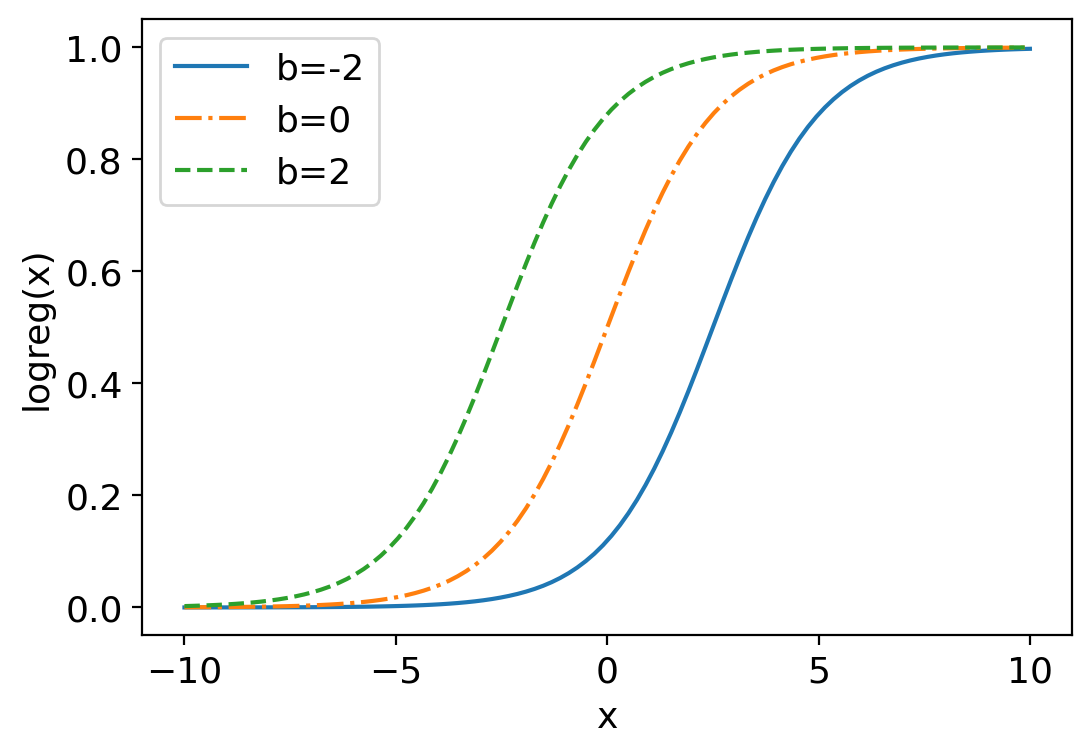

In [21]:
## 여러가지 b 값의 차이 보기

xs = np.linspace(-10, 10, 100)

a = 0.8
plt.plot(xs, logreg(a*xs -2), label='b=-2', ls='-')
plt.plot(xs, logreg(a*xs + 0), label='b=0', ls='-.')
plt.plot(xs, logreg(a*xs + 2), label='b=2', ls='--')
plt.xlabel("x")
plt.ylabel("logreg(x)")

plt.legend()

# 로지스틱 회귀 모델

a, b =  0.7535393323398049 -5.963814446471743


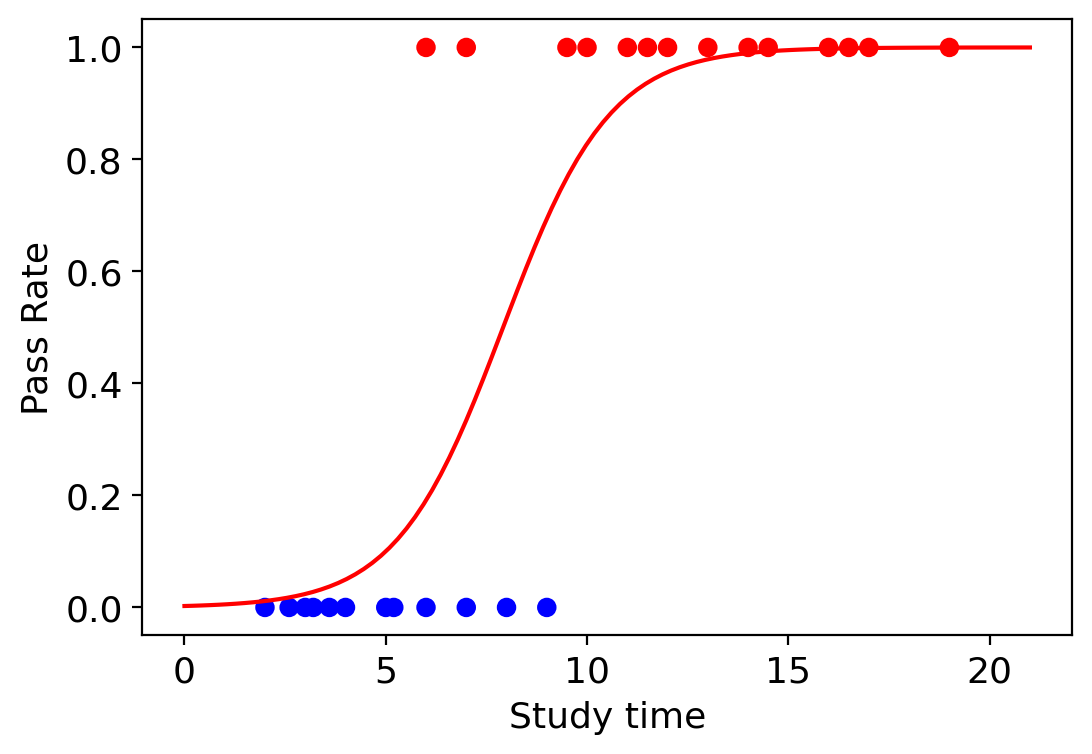

In [22]:
## 로지스틱 회귀 모델로 합격 예측하기

X = df[['study_time']]
y = df['pass']

model = LogisticRegression() # 모델 선택
model.fit(X,y)   # 모델 학습

a, b = model.coef_[0][0], model.intercept_[0]
print('a, b = ', a, b)
plt.xlabel("Study time")
plt.ylabel("Pass Rate")
plt.scatter(df['study_time'], df['pass'], c=df['pass'], cmap='bwr')

# 로지스틱 회귀 모델
xs = np.linspace(0,21,100)
ys = logreg(a*xs + b) 
plt.plot(xs, ys, c='r')
plt.show()

## 모델 사용
- 이진 분류 결과 예측에는 predict() 사용
- 이진 분류 확률 (클래스 확률)을 구하려면 predict_proba() 사용

In [43]:
## 공부시간에 따른 합격 여부 예측

# 임의의 공부 시간
X_test = pd.DataFrame({'study_time': np.array((4,5,6,7,8,9,10,11))})
print(X_test)

   study_time
0           4
1           5
2           6
3           7
4           8
5           9
6          10
7          11


In [44]:
print('합격/불합격 예측')
print(model.predict(X_test)) # 모델 사용 (이진 분류 예측)

print('클래스 확률')  # 클래스 확률 보기
print(model.predict_proba(X_test).round(3))

합격/불합격 예측
[0 0 0 0 1 1 1 1]
클래스 확률
[[0.95  0.05 ]
 [0.9   0.1  ]
 [0.809 0.191]
 [0.666 0.334]
 [0.484 0.516]
 [0.306 0.694]
 [0.172 0.828]
 [0.089 0.911]]


## 클래스=1일 확률

In [45]:
model.predict_proba(X_test)[:,1]

array([0.04975272, 0.10009966, 0.19114638, 0.33424686, 0.51611946,
       0.69382003, 0.82800857, 0.91093606])

## 정밀도와 재현률 변경

In [46]:
## 분류 경계값(확률)을 조정하여 정밀도, 재현율을 변경

print('기본 모델의 예측 (p > 0.5)')
print((model.predict_proba(X_test)[:,1] > 0.5)*1)
print('정밀도를 높인 모델의 예측 (p > 0.7)')
print((model.predict_proba(X_test)[:,1] > 0.7)*1)
print('재현율을 높인 모델의 예측 (p > 0.3)')
print((model.predict_proba(X_test)[:,1] > 0.3)*1)

기본 모델의 예측 (p > 0.5)
[0 0 0 0 1 1 1 1]
정밀도를 높인 모델의 예측 (p > 0.7)
[0 0 0 0 0 0 1 1]
재현율을 높인 모델의 예측 (p > 0.3)
[0 0 0 1 1 1 1 1]


# 소프트맥스

- 로지스틱 회귀 모델은 이진 분류만 가능하다
- 3개 이상의 클래스 분류 확률을 구하려면 소프트맥스를 사용한다
  - 분류 모델이 내부적으로 선형 점수를 확률 값으로 매핑하는데 소프트맥스를 사용한다
  - 확률의 비율을 구하는데 점수에 exp를 취한 값의 비율을 사용한다
  - 이를 다항 로지스틱스라고도 한다

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.25.18.png?raw=1" align='left'  width=400>

In [26]:
## 소프트맥스 정의와 예시

def get_softmax(scores):
    prob = np.exp(np.array(score))
    return prob/prob.sum()

scores = [[1,2,3], [7,8,9],[-4, -3, -2], [0.3, 0.7]] 
for score in scores:
    prob = get_softmax(score)
    print(prob.round(3))

[0.09  0.245 0.665]
[0.09  0.245 0.665]
[0.09  0.245 0.665]
[0.401 0.599]


# (실습) 합격자, 불합격자의 공부시간 변경
- 많이 공부하고도 불합격할 수 있고, 적게 공부하고도 합격할 수 있는 경우를 데이터에 반영한다
- 일정 시간 (예를 들어 10시간) 이상 공부한 사람은 모두 합격하고, 그 이하로 공부한 사람은 모두 불합격한 경우의 데이터를 사용해본다 (이진 분류 경계가 명확한 경우)